In [1]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import plotly.express as px

from datetime import datetime

In [2]:
pd.set_option('display.max_rows', 100)

In [3]:
country_list = ['Canada', 'Chile', 'Mexico', 'Chinese Taipei', 'Hong Kong SAR', 'Japan', 
                'Korea (ROK)', 'Macao, China', 'Maldives', 'Cambodia', 'Indonesia', 'Singapore', 
                'New Zealand', 'USA', 'Thailand', 'Turkey', 'Australia', 'Hawaii', 'Austria', 'Czech']

In [4]:
len(country_list)

20

# GDP
https://docs.google.com/spreadsheets/d/17p7CPobPSyWb5dmVyf_bmZg9Jbh4PjlRPc0G1tJjTUk/edit#gid=501532268
https://databank.worldbank.org/source/world-development-indicators#
https://dbedt.hawaii.gov/economic/datawarehouse/

In [5]:
gdp_df = pd.read_excel('./data/downloaded/GM-GDP per capita - Dataset - v28.xlsx', 
                       sheet_name='data-for-countries-etc-by-year')

In [6]:
gdp_df['name'] = gdp_df['name'].replace({'Taiwan': 'Chinese Taipei', 'Hong Kong, China': 'Hong Kong SAR',
                                        'South Korea': 'Korea (ROK)', 'United States': 'USA', 
                                        'Czech Republic': 'Czech'})

In [7]:
[x for x in country_list if x not in gdp_df['name'].values]

['Macao, China', 'Hawaii']

In [8]:
gdp_df.head()

geo         name  time  Income per person   GDP total  \
0  afg  Afghanistan  1800                683  2239040467   
1  afg  Afghanistan  1801                683  2239040467   
2  afg  Afghanistan  1802                683  2239040467   
3  afg  Afghanistan  1803                683  2239040467   
4  afg  Afghanistan  1804                683  2239040467   

   GDP per capita growth (%)  
0                        0.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0

In [9]:
macao_gdp = pd.read_excel('./data/downloaded/P_Data_Extract_From_World_Development_Indicators.xlsx', 
                           sheet_name='Data')

In [10]:
macao_gdp = macao_gdp[macao_gdp['Series Code'].isin(['NY.GDP.MKTP.KD', 'NY.GDP.PCAP.KD', 'NY.GDP.PCAP.KD.ZG']) &
                      (macao_gdp['Country Name'] == 'Macao SAR, China')].T

In [11]:
macao_gdp = macao_gdp.reset_index()
macao_gdp.columns = ['time', 'GDP total', 'Income per person', 'GDP per capita growth (%)']
macao_gdp = macao_gdp.iloc[4:].replace('..', np.nan)
macao_gdp['time'] = macao_gdp['time'].str.slice(0, 4)
macao_gdp = macao_gdp.astype(float)
macao_gdp['time'] = macao_gdp['time'].astype(int)
macao_gdp['geo'] = 'mac'
macao_gdp['name'] = 'Macao, China'

In [12]:
hawaii_gdp = pd.read_excel('./data/downloaded/DBEDT Data Warehouse.xlsx', header=1)

In [13]:
hawaii_gdp = hawaii_gdp[hawaii_gdp['Indicator'].isin(['GDP- All industry total', 
                                                      'Per Capita Personal Income'])].T

In [14]:
hawaii_gdp = hawaii_gdp.iloc[3:-1]
hawaii_gdp = hawaii_gdp.reset_index()
hawaii_gdp.columns = ['time', 'GDP total', 'Income per person',]
hawaii_gdp['GDP total'] = hawaii_gdp['GDP total'].str.replace(',', '')
hawaii_gdp['Income per person'] = hawaii_gdp['Income per person'].str.replace(',', '')
hawaii_gdp = hawaii_gdp.astype(float)
hawaii_gdp['time'] = hawaii_gdp['time'].astype(int)
hawaii_gdp['GDP total'] = hawaii_gdp['GDP total'] * 1000000
hawaii_gdp['geo'] = 'haw'
hawaii_gdp['name'] = 'Hawaii'
hawaii_gdp['GDP per capita growth (%)'] = hawaii_gdp['Income per person'].pct_change() * 100

In [15]:
gdp_df = pd.concat([gdp_df, macao_gdp, hawaii_gdp], axis=0, ignore_index=True)

In [16]:
gdp_df = gdp_df[gdp_df['name'].isin(country_list) & gdp_df['time'].between(1970, 2025)].reset_index(drop=True)
gdp_df = gdp_df.drop(columns='geo').rename(columns={'name': 'Country', 'time': 'Year',
                                                    'Income per person': 'GDP Per Capita'})

In [17]:
gdp_df.to_csv('./data/GDP.csv', index=False)

In [18]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    1111 non-null   object 
 1   Year                       1111 non-null   int64  
 2   GDP Per Capita             1101 non-null   float64
 3   GDP total                  1074 non-null   float64
 4   GDP per capita growth (%)  1100 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 43.5+ KB


In [19]:
def plot_data(df, column='GDP Per Capita', country=None, by_month=False):
    fig, ax = plt.subplots(figsize=(12, 6))
    if country is not None:
        if isinstance(country, str):
            country = [country]
        df = df[df['Country'].isin(country)]
    else:
        country = df['Country'].unique()
    sns.lineplot(data=df, x='Year', y=column, hue='Country', ax=ax)
    plt.xticks(rotation=45, ha='right')
    return df

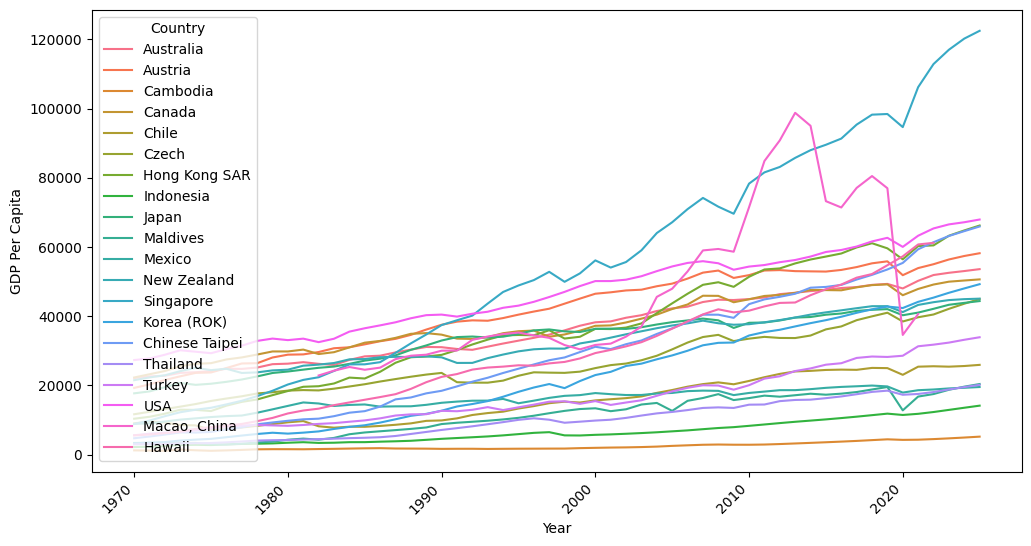

In [20]:
_ = plot_data(gdp_df)

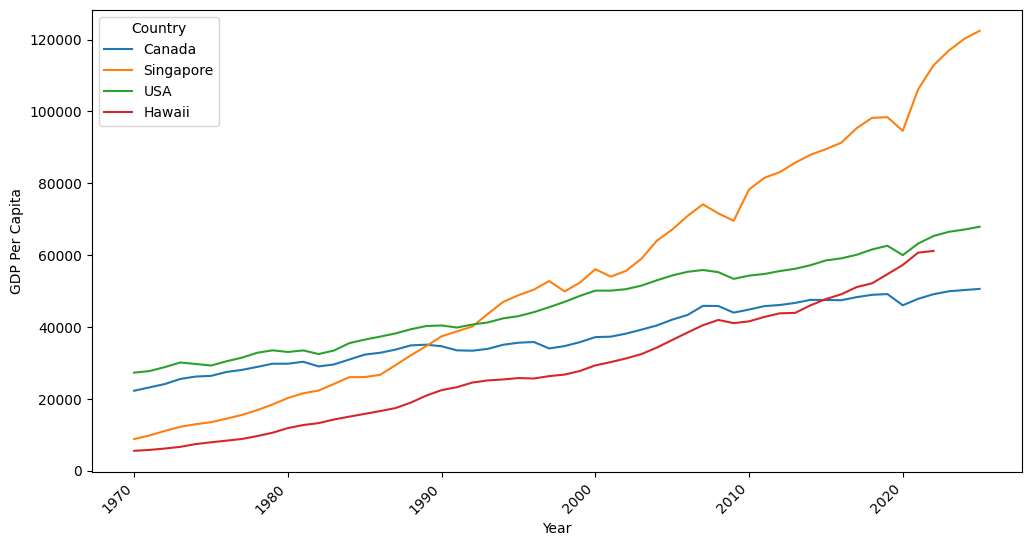

In [21]:
_ = plot_data(gdp_df, country=['USA', 'Singapore', 'Canada', 'Hawaii'])

# Population
https://docs.google.com/spreadsheets/d/1c1luQNdpH90tNbMIeU7jD__59wQ0bdIGRFpbMm8ZBTk/edit#gid=501532268
https://databank.worldbank.org/source/world-development-indicators#
https://dbedt.hawaii.gov/economic/datawarehouse/

In [22]:
pop_df = pd.read_excel('./data/downloaded/GM-Population - Dataset - v6.xlsx', 
                       sheet_name='data-for-countries-etc-by-year')

In [23]:
pop_df['name'] = pop_df['name'].replace({'Taiwan': 'Chinese Taipei', 'Hong Kong, China': 'Hong Kong SAR',
                                        'South Korea': 'Korea (ROK)', 'United States': 'USA', 
                                        'Czech Republic': 'Czech'})

In [24]:
[x for x in country_list if x not in pop_df['name'].values]

['Macao, China', 'Hawaii']

In [25]:
macao_pop = pd.read_excel('./data/downloaded/P_Data_Extract_From_World_Development_Indicators.xlsx', 
                           sheet_name='Data')

In [26]:
macao_pop = macao_pop[macao_pop['Series Code'].isin(['SP.POP.TOTL']) &
                      (macao_pop['Country Name'] == 'Macao SAR, China')].T

In [27]:
macao_pop = macao_pop.reset_index()
macao_pop.columns = ['time', 'Population']
macao_pop = macao_pop.iloc[4:].replace('..', np.nan)
macao_pop['time'] = macao_pop['time'].str.slice(0, 4)
macao_pop = macao_pop.astype(float)
macao_pop['time'] = macao_pop['time'].astype(int)
macao_pop['geo'] = 'mac'
macao_pop['name'] = 'Macao, China'

In [28]:
hawaii_pop = pd.read_excel('./data/downloaded/DBEDT Data Warehouse.xlsx', header=1)

In [29]:
hawaii_pop = hawaii_pop[hawaii_pop['Indicator'].isin(['Total Resident Population'])].T

In [30]:
hawaii_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, Indicator to Source
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       87 non-null     object
dtypes: object(1)
memory usage: 3.4+ KB


In [31]:
hawaii_pop = hawaii_pop.iloc[3:-1]
hawaii_pop = hawaii_pop.reset_index()
hawaii_pop.columns = ['time', 'Population',]
hawaii_pop['Population'] = hawaii_pop['Population'].astype(float)
hawaii_pop = hawaii_pop.astype(float)
hawaii_pop['time'] = hawaii_pop['time'].astype(int)
hawaii_pop['geo'] = 'haw'
hawaii_pop['name'] = 'Hawaii'

In [32]:
pop_df = pd.concat([pop_df, macao_pop, hawaii_pop], axis=0, ignore_index=True)

In [33]:
pop_df = pop_df[pop_df['name'].isin(country_list) & pop_df['time'].between(1970, 2025)].reset_index(drop=True)
pop_df = pop_df.drop(columns='geo').rename(columns={'name': 'Country', 'time': 'Year'})

In [34]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     1111 non-null   object 
 1   Year        1111 non-null   int64  
 2   Population  1110 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 26.2+ KB


In [35]:
pop_df.to_csv('./data/Population.csv', index=False)

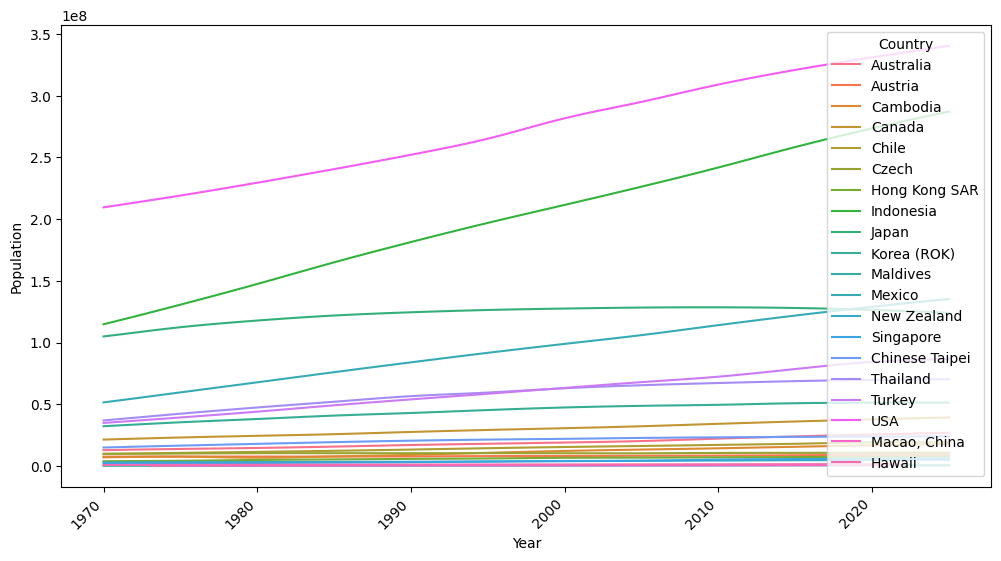

In [36]:
_ = plot_data(pop_df, column='Population')

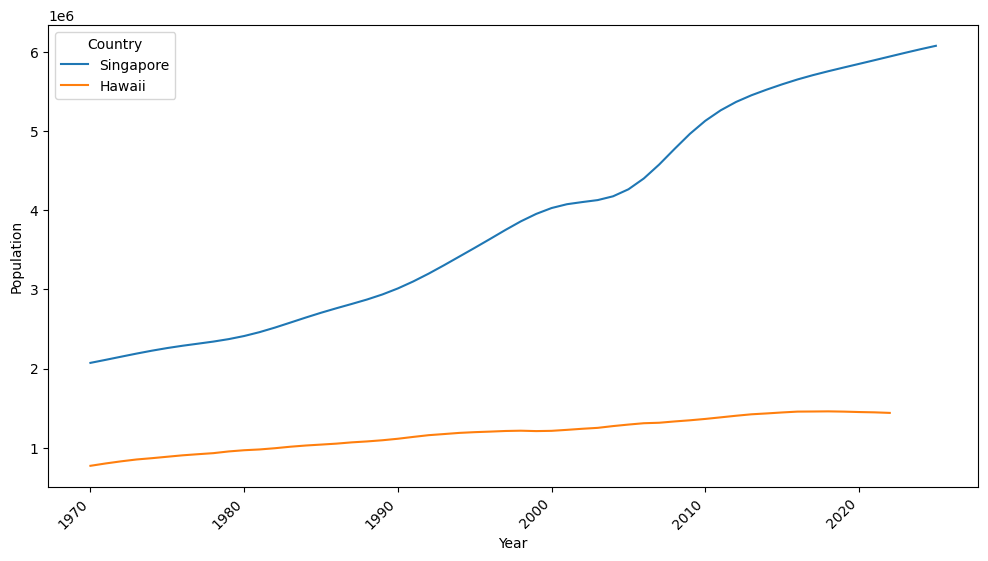

In [37]:
_ = plot_data(pop_df, column='Population', country=['Singapore', 'Hawaii'])

# Tourism Indicator
https://www.unwto.org/tourism-statistics/key-tourism-statistics

In [38]:
hotel_df = pd.read_excel('./data/downloaded/unwto-tourism-industries-data.xlsx', header=2)

In [39]:
kv = {'CANADA': 'Canada', 'CHILE': 'Chile', 'MEXICO': 'Mexico', 'TAIWAN PROVINCE OF CHINA': 'Chinese Taipei', 'HONG KONG, CHINA': 'Hong Kong SAR', 'JAPAN': 'Japan',
      'KOREA, REPUBLIC OF': 'Korea (ROK)', 'MACAO, CHINA': 'Macao, China', 'MALDIVES': 'Maldives', 'CAMBODIA': 'Cambodia', 'INDONESIA': 'Indonesia', 'SINGAPORE': 'Singapore',
      'NEW ZEALAND': 'New Zealand', 'UNITED STATES OF AMERICA': 'USA', 'THAILAND': 'Thailand', 'TÜRKIYE': 'Turkey', 'AUSTRALIA': 'Australia', 'AUSTRIA': 'Austria', 'CZECH REPUBLIC (CZECHIA)': 'Czech'}
tour_df = []
for k, v in kv.items():
    idx = hotel_df[hotel_df['Basic data and indicators'] == k].index[0]
    temp_df = hotel_df.iloc[idx:]
    noe = temp_df[temp_df['Unnamed: 5'] == 'Number of establishments'].iloc[0, 10:37].replace('..', np.nan).astype(float)
    nor = temp_df[temp_df['Unnamed: 5'] == 'Number of rooms'].iloc[0, 10:37].replace('..', np.nan).astype(float)
    temp_df = pd.DataFrame({'Country': v, 'Hotels count': noe, 'Rooms count': nor})
    temp_df = temp_df.reset_index(names='Year')
    if k == 'JAPAN':
        temp_df.loc[temp_df['Year'].between(2008, 2009), ['Hotels count', 'Rooms count']] = np.nan
    tour_df.append(temp_df)
tour_df = pd.concat(tour_df, ignore_index=True)

In [40]:
[x for x in country_list if x not in tour_df['Country'].unique()]

['Hawaii']

In [41]:
tour_df.to_csv('./data/TourismIndicator.csv', index=False)

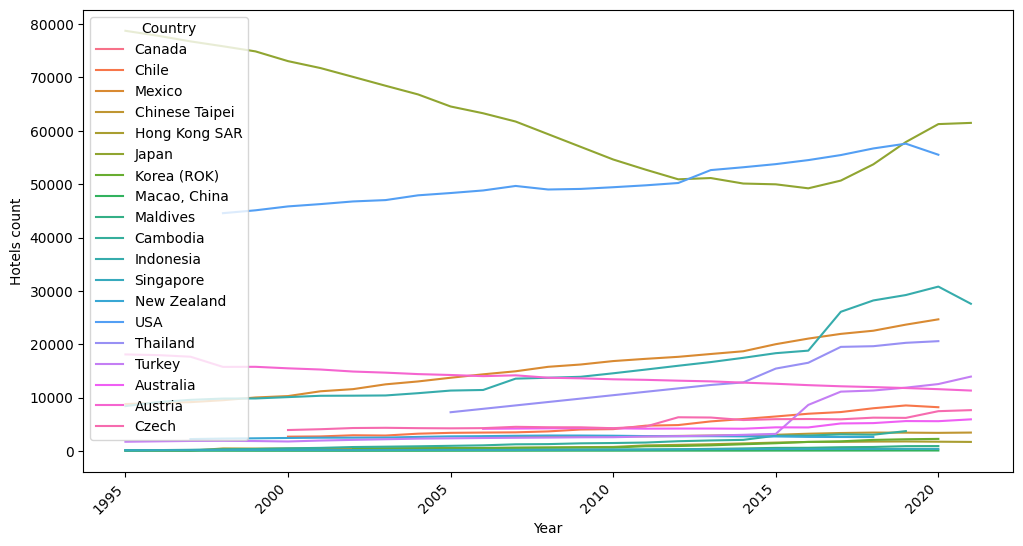

In [42]:
_ = plot_data(tour_df, column='Hotels count')

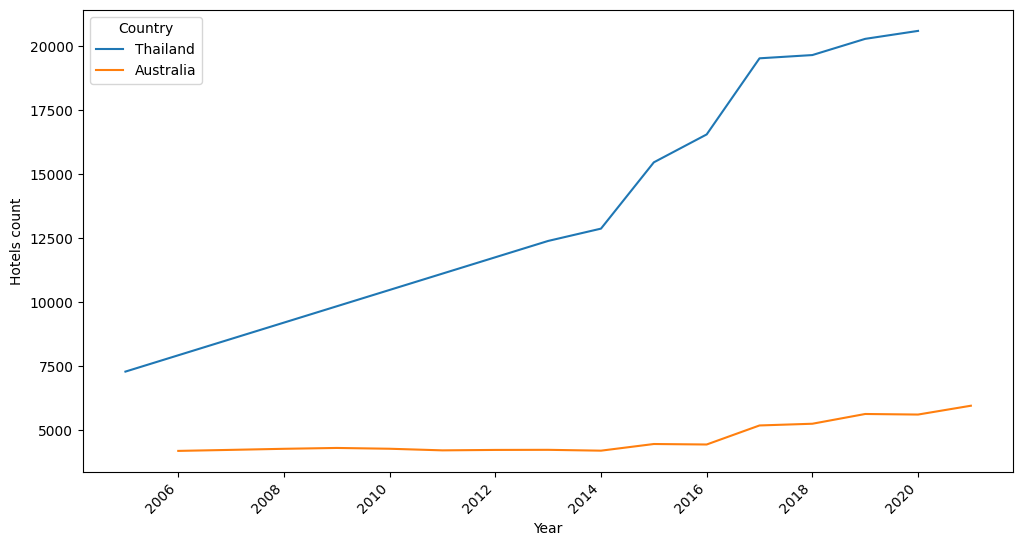

In [221]:
_ = plot_data(tour_df, country=['Australia', 'Thailand'], column='Hotels count')

# Covid Data
https://covid19.who.int/data

In [43]:
covid_df = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv')

In [44]:
kv = {'Canada': 'Canada', 'Chile': 'Chile', 'Mexico': 'Mexico', 'Japan': 'Japan', 'Hong Kong SAR': 'Hong Kong SAR', 'Chinese Taipei': 'Chinese Taipei', 'Macao, China': 'Macao, China',
      'Republic of Korea': 'Korea (ROK)', 'Maldives': 'Maldives', 'Cambodia': 'Cambodia', 'INDONESIA': 'Indonesia', 'SINGAPORE': 'Singapore', 'Hawaii': 'Hawaii',
      'New Zealand': 'New Zealand', 'United States of America': 'USA', 'Thailand': 'Thailand', 'Türkiye': 'Turkey', 'Australia': 'Australia', 'Austria': 'Austria', 'Czechia': 'Czech'}

In [45]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300042 entries, 0 to 300041
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      300042 non-null  object
 1   Country_code       298776 non-null  object
 2   Country            300042 non-null  object
 3   WHO_region         300042 non-null  object
 4   New_cases          300042 non-null  int64 
 5   Cumulative_cases   300042 non-null  int64 
 6   New_deaths         300042 non-null  int64 
 7   Cumulative_deaths  300042 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 18.3+ MB


In [46]:
headers = {
    'sec-ch-ua': '"Not.A/Brand";v="8", "Chromium";v="114", "Google Chrome";v="114"',
    'Referer': 'https://coronalevel.com/China/Hong_Kong/',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36',
    'sec-ch-ua-platform': '"macOS"',
}

response = requests.get('https://coronalevel.com/China/Hong_Kong/datagroup-1d-v3.json', headers=headers)
hk_covid = response.json()
for series in hk_covid['series']:
    if series['name'] == 'New cases (daily change)':
        hk_covid_new = series['data']
    if series['name'] == 'New deaths (daily change)':
        hk_covid_death = series['data']
hk_covid_df = pd.DataFrame(hk_covid_new, columns=['Date', 'New_cases'])
hk_covid_df['Date'] = pd.to_datetime(hk_covid_df['Date'], unit='ms').dt.strftime('%Y-%m-%d')
hk_covid_df2 = pd.DataFrame(hk_covid_death, columns=['Date', 'New_deaths'])
hk_covid_df2['Date'] = pd.to_datetime(hk_covid_df2['Date'], unit='ms').dt.strftime('%Y-%m-%d')
hk_covid_df = pd.concat([hk_covid_df.set_index('Date'), hk_covid_df2.set_index('Date')], axis=1).reset_index(names='Date_reported')
hk_covid_df['Country'] = 'Hong Kong SAR'

In [47]:
headers = {
    'sec-ch-ua': '"Not.A/Brand";v="8", "Chromium";v="114", "Google Chrome";v="114"',
    'Referer': 'https://coronalevel.com/Taiwan/',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36',
    'sec-ch-ua-platform': '"macOS"',
}

response = requests.get('https://coronalevel.com/Taiwan/datagroup-1d-v3.json', headers=headers)
tw_covid = response.json()
for series in tw_covid['series']:
    if series['name'] == 'New cases (daily change)':
        tw_covid_new = series['data']
    if series['name'] == 'New deaths (daily change)':
        tw_covid_death = series['data']
tw_covid_df = pd.DataFrame(tw_covid_new, columns=['Date', 'New_cases'])
tw_covid_df['Date'] = pd.to_datetime(tw_covid_df['Date'], unit='ms').dt.strftime('%Y-%m-%d')
tw_covid_df2 = pd.DataFrame(tw_covid_death, columns=['Date', 'New_deaths'])
tw_covid_df2['Date'] = pd.to_datetime(tw_covid_df2['Date'], unit='ms').dt.strftime('%Y-%m-%d')
tw_covid_df = pd.concat([tw_covid_df.set_index('Date'), tw_covid_df2.set_index('Date')], axis=1).reset_index(names='Date_reported')
tw_covid_df['Country'] = 'Chinese Taipei'

In [48]:
headers = {
    'sec-ch-ua': '"Not.A/Brand";v="8", "Chromium";v="114", "Google Chrome";v="114"',
    'Referer': 'https://coronalevel.com/China/Macau/',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36',
    'sec-ch-ua-platform': '"macOS"',
}

response = requests.get('https://coronalevel.com/China/Macau/datagroup-1d-v3.json', headers=headers)
mc_covid = response.json()
for series in mc_covid['series']:
    if series['name'] == 'New cases (daily change)':
        mc_covid_new = series['data']
    if series['name'] == 'New deaths (daily change)':
        mc_covid_death = series['data']
mc_covid_df = pd.DataFrame(mc_covid_new, columns=['Date', 'New_cases'])
mc_covid_df['Date'] = pd.to_datetime(mc_covid_df['Date'], unit='ms').dt.strftime('%Y-%m-%d')
mc_covid_df2 = pd.DataFrame(mc_covid_death, columns=['Date', 'New_deaths'])
mc_covid_df2['Date'] = pd.to_datetime(mc_covid_df2['Date'], unit='ms').dt.strftime('%Y-%m-%d')
mc_covid_df = pd.concat([mc_covid_df.set_index('Date'), mc_covid_df2.set_index('Date')], axis=1).reset_index(names='Date_reported')
mc_covid_df['Country'] = 'Macao, China'

In [49]:
headers = {
    'sec-ch-ua': '"Not.A/Brand";v="8", "Chromium";v="114", "Google Chrome";v="114"',
    'Referer': 'https://coronalevel.com/United_States/Hawaii/',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36',
    'sec-ch-ua-platform': '"macOS"',
}

response = requests.get('https://coronalevel.com/United_States/Hawaii/datagroup-1d-v3.json', headers=headers)
hw_covid = response.json()
for series in hw_covid['series']:
    if series['name'] == 'New cases (daily change)':
        hw_covid_new = series['data']
    if series['name'] == 'New deaths (daily change)':
        hw_covid_death = series['data']
hw_covid_df = pd.DataFrame(hw_covid_new, columns=['Date', 'New_cases'])
hw_covid_df['Date'] = pd.to_datetime(hw_covid_df['Date'], unit='ms').dt.strftime('%Y-%m-%d')
hw_covid_df2 = pd.DataFrame(hw_covid_death, columns=['Date', 'New_deaths'])
hw_covid_df2['Date'] = pd.to_datetime(hw_covid_df2['Date'], unit='ms').dt.strftime('%Y-%m-%d')
hw_covid_df = pd.concat([hw_covid_df.set_index('Date'), hw_covid_df2.set_index('Date')], axis=1).reset_index(names='Date_reported')
hw_covid_df['Country'] = 'Hawaii'

In [50]:
covid_df = pd.concat([covid_df[['Date_reported', 'Country', 'New_cases', 'New_deaths']], hk_covid_df, mc_covid_df, tw_covid_df, hw_covid_df], ignore_index=True)

In [51]:
covid_df['Date'] = pd.to_datetime(covid_df['Date_reported'].str.slice(0, -3))
covid_df = covid_df.groupby(['Country', 'Date'])[['New_cases', 'New_deaths']].sum().reset_index()

In [52]:
covid_df['Country'] = covid_df['Country'].replace(kv)
covid_df = covid_df[covid_df['Country'].isin(kv.values())].reset_index(drop=True).rename(columns={'New_cases': 'New Cases', 'New_deaths': 'New Deaths'})

In [53]:
[x for x in country_list if x not in covid_df['Country'].unique()]

[]

In [54]:
covid_df

Country       Date  New Cases  New Deaths
0    Australia 2020-01-01        9.0         0.0
1    Australia 2020-02-01       16.0         0.0
2    Australia 2020-03-01     4334.0        21.0
3    Australia 2020-04-01     2387.0        74.0
4    Australia 2020-05-01      439.0        12.0
..         ...        ...        ...         ...
821        USA 2023-02-01  1085170.0     12111.0
822        USA 2023-03-01   678002.0      7909.0
823        USA 2023-04-01   568838.0      7009.0
824        USA 2023-05-01   170425.0      3089.0
825        USA 2023-06-01        0.0         0.0

[826 rows x 4 columns]

In [55]:
covid_df.to_csv('./data/CovidCases.csv', index=False)

In [56]:
def plot_data_date(df, column='New Cases', country=None, by_month=False):
    fig, ax = plt.subplots(figsize=(12, 6))
    if country is not None:
        if isinstance(country, str):
            country = [country]
        for c in country:
            assert c in df['Country'].unique()
        df = df[df['Country'].isin(country)]
    else:
        country = df['Country'].unique()

    if by_month:
        df['Year'], df['Month'] = df['Date'].dt.year.astype(str), df['Date'].dt.month
        if len(country) == 1:
            sns.lineplot(data=df, x='Month', y=column, hue='Year', ax=ax)
        else:
            sns.lineplot(data=df, x='Month', y=column, hue='Country', style='Year', ax=ax)
    else:
        sns.lineplot(data=df, x='Date', y=column, hue='Country', ax=ax)
    
    plt.xticks(rotation=45, ha='right')
    return df

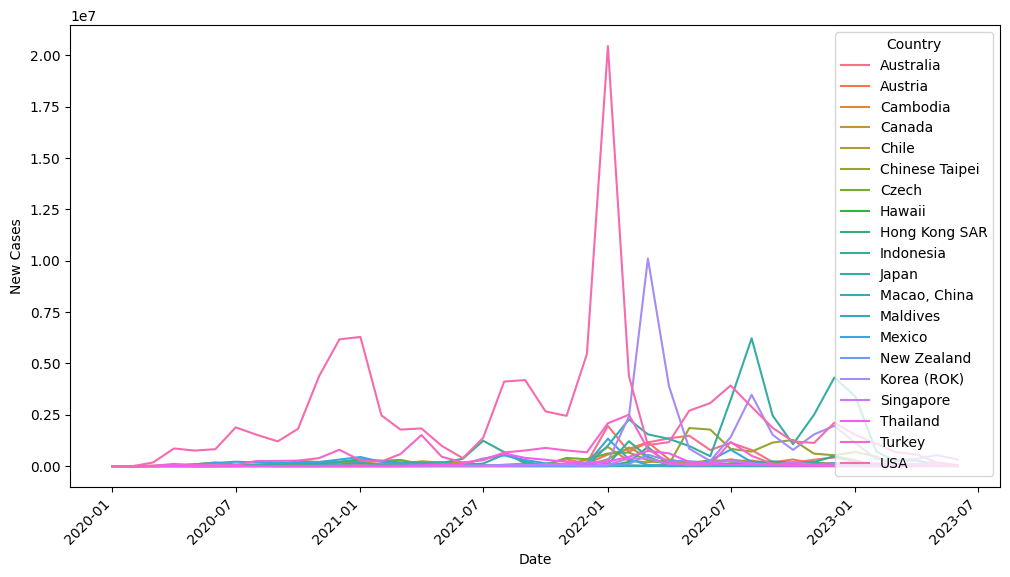

In [57]:
_ = plot_data_date(covid_df, column='New Cases')

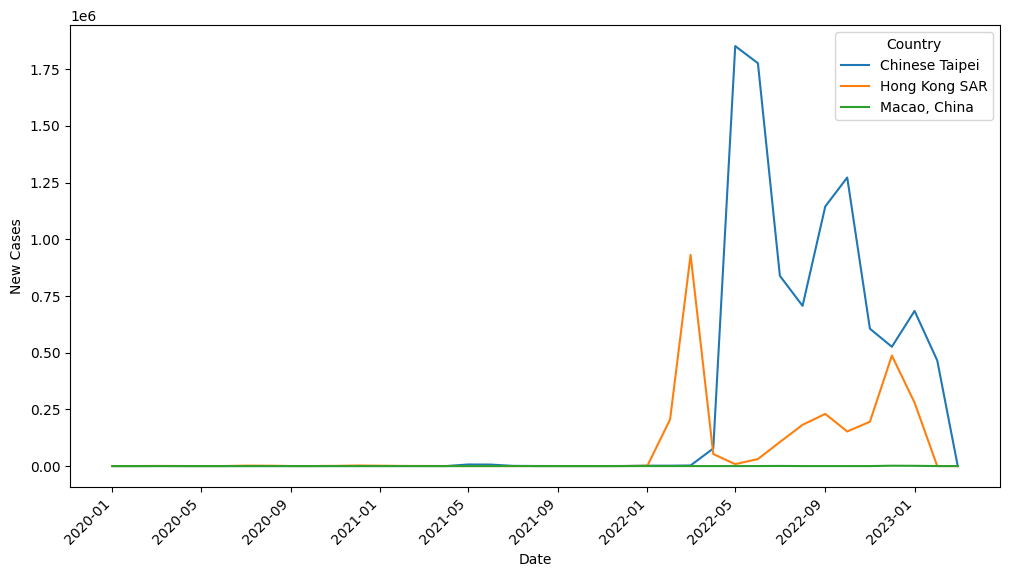

In [58]:
_ = plot_data_date(covid_df, column='New Cases', country=['Chinese Taipei', 'Hong Kong SAR', 'Macao, China'])

# Travel Policy
https://ourworldindata.org/grapher/international-travel-covid?time=latest
https://github.com/OxCGRT/covid-policy-tracker/tree/master/data
0 - no restrictions
1 - screening arrivals
2 - quarantine arrivals from some or all regions
3 - ban arrivals from some regions
4 - ban on all regions or total border closure
Blank - no data

In [59]:
travel_df = pd.read_csv('https://github.com/OxCGRT/covid-policy-tracker/raw/master/data/OxCGRT_nat_latest.csv')[['CountryName', 'Date', 'C8EV_International travel controls']]

In [60]:
travel_df = travel_df.rename(columns={'CountryName': 'Country', 'C8EV_International travel controls': 'Travel Policy'})
# manually add data
add_data = [['Chile', 20230503, 0.0], ['Chinese Taipei', 20230214, 0.0], ['Hong Kong SAR', 20230206, 0.0], ['Indonesia', 20230614, 0.0], ['Japan', 20230501, 0.0], ['Macao, China', 20230206, 0.0],
            ['Mexico', 20230101, 0.0], ['Singapore', 20230213, 0.0], ['USA', 20230208, 0.0],
            ['Maldives', 20200101, 0.0], ['Maldives', 20200327, 4.0], ['Maldives', 20200526, 3.0], ['Maldives', 20200715, 1.0], ['Maldives', 20210512, 3.0], 
            ['Maldives', 20210715, 1.0], ['Maldives', 20211128, 3.0], ['Maldives', 20220131, 1.0], ['Maldives', 20220305, 0.0]]
travel_df = pd.concat([travel_df, pd.DataFrame(add_data, columns=['Country', 'Date', 'Travel Policy'])], ignore_index=True)
travel_df['Date'] = pd.to_datetime(travel_df['Date'].astype(str).str.slice(0, -2), format='%Y%m')

In [61]:
travel_df['Country'] = travel_df['Country'].replace({'Taiwan': 'Chinese Taipei', 'Hong Kong': 'Hong Kong SAR', 'South Korea': 'Korea (ROK)',
                                                     'Macao': 'Macao, China', 'United States': 'USA', 'Czech Republic': 'Czech'})
travel_df = travel_df[travel_df['Country'].isin(country_list)].reset_index(drop=True)
travel_df = travel_df.groupby(['Country', 'Date'])['Travel Policy'].agg(lambda x: max(pd.Series.mode(x))).reset_index()

In [62]:
[x for x in country_list if x not in travel_df['Country'].unique()]

['Hawaii']

In [63]:
travel_df.to_csv('./data/TravelPolicy.csv', index=False)

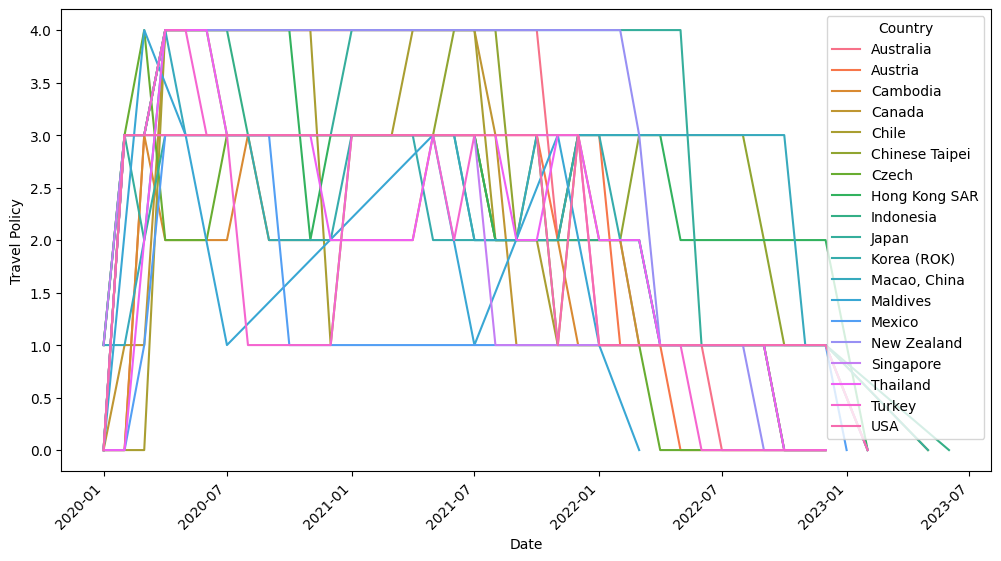

In [64]:
_ = plot_data_date(travel_df, column='Travel Policy')

# FSI
https://fragilestatesindex.org/excel/

In [65]:
fsi_dir = './data/downloaded/FSI'
fsi_df = []
for f in os.listdir(fsi_dir):
    temp_df = pd.read_excel(os.path.join(fsi_dir, f))[['Country', 'Year', 'Total']]
    temp_df['Country'] = temp_df['Country'].replace({'South Korea': 'Korea (ROK)', 'United States': 'USA', 'Czech Republic': 'Czech'})
    temp_df = temp_df[temp_df['Country'].isin(country_list + ['China'])]
    if temp_df['Year'].dtype == np.int64:
        temp_df['Year'] = pd.to_datetime(temp_df['Year'].astype(str), format='%Y')
    fsi_df.append(temp_df)
fsi_df = pd.concat(fsi_df, ignore_index=True).rename(columns={'Total': 'FSI Index'})

In [66]:
[x for x in country_list if x not in fsi_df['Country'].unique()]

['Chinese Taipei', 'Hong Kong SAR', 'Macao, China', 'Hawaii']

In [67]:
fsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Country    295 non-null    object        
 1   Year       295 non-null    datetime64[ns]
 2   FSI Index  295 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 7.0+ KB


In [68]:
fsi_df.to_csv('./data/FSI.csv', index=False)

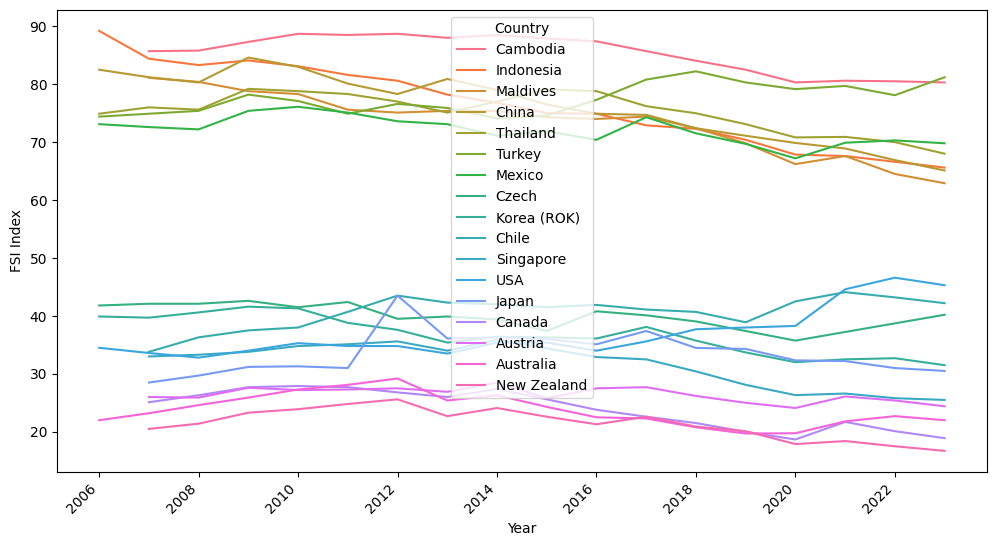

In [69]:
_ = plot_data(fsi_df, column='FSI Index')

In [70]:
fsi_df.sort_values(by=['Year', 'Country'])

Country       Year  FSI Index
260    Australia 2006-01-01       22.0
253        China 2006-01-01       82.5
257        Czech 2006-01-01       41.8
252    Indonesia 2006-01-01       89.2
258  Korea (ROK) 2006-01-01       39.9
..           ...        ...        ...
33   New Zealand 2023-01-01       16.7
29     Singapore 2023-01-01       25.5
20      Thailand 2023-01-01       68.0
17        Turkey 2023-01-01       81.2
24           USA 2023-01-01       45.3

[295 rows x 3 columns]

# Geographical Data
https://github.com/google/dspl/tree/master

In [71]:
geo_df = pd.read_csv('https://github.com/google/dspl/raw/master/samples/google/canonical/countries.csv')

In [72]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    244 non-null    object 
 1   latitude   244 non-null    float64
 2   longitude  244 non-null    float64
 3   name       245 non-null    object 
dtypes: float64(2), object(2)
memory usage: 7.8+ KB


In [73]:
geo_df['name'] = geo_df['name'].replace({'Taiwan': 'Chinese Taipei', 'Hong Kong': 'Hong Kong SAR', 'Macau': 'Macao, China', 'United States': 'USA',
                                         'Czech Republic': 'Czech', 'South Korea': 'Korea (ROK)'})
geo_df = pd.concat([geo_df, pd.DataFrame([['USHI', 19.898682, -155.665857, 'Hawaii']], columns=geo_df.columns)], ignore_index=True)
geo_df = geo_df[geo_df['name'].isin(country_list + ['China'])].reset_index(drop=True)

In [74]:
[x for x in country_list if x not in geo_df['name'].unique()]

[]

In [75]:
geo_df = geo_df.drop(columns='country').rename(columns={'name': 'Country'})

In [76]:
geo_df.to_csv('./data/Geographical.csv', index=False)

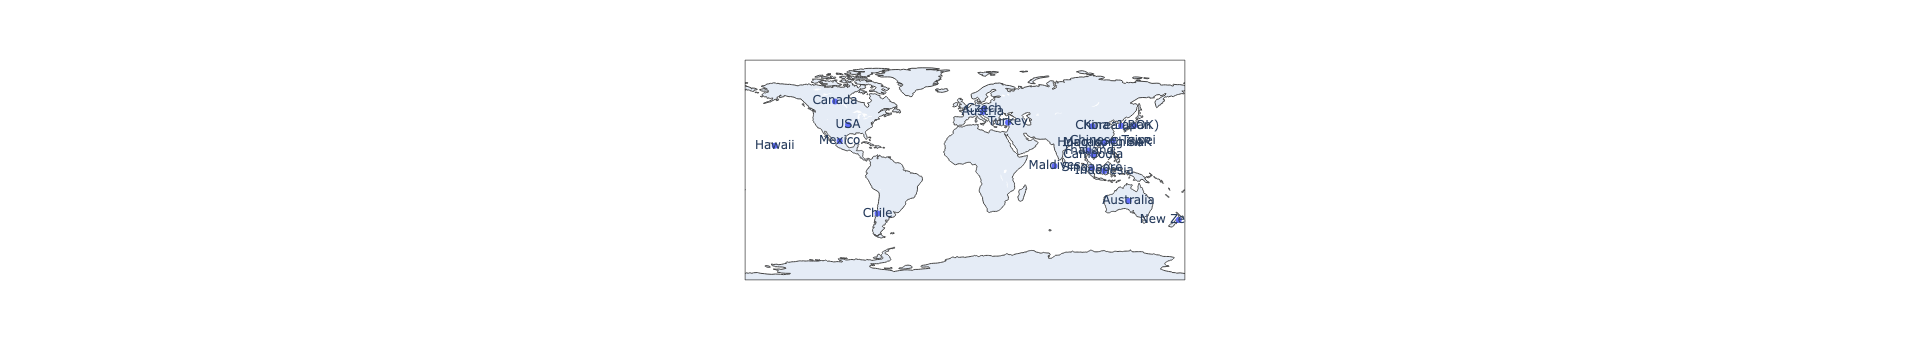

In [77]:
fig = px.scatter_geo(geo_df, lat='latitude', lon='longitude', text='Country')
fig.show()

# Google Trend
https://trends.google.com/trends/

In [213]:
trend_df = pd.read_csv('./data/downloaded/CovidGoogleTrend.csv', header=1)

In [214]:
trend_df['Week'] = pd.to_datetime(trend_df['Week'])
trend_df = trend_df.rename(columns={'covid: (Worldwide)': 'GlobalCovidTrend'})
trend_df['GlobalCovidTrend'] = trend_df['GlobalCovidTrend'].replace({'<1': '0'}).astype(int)

In [215]:
trend_df

Week  GlobalCovidTrend
0   2018-06-24                 0
1   2018-07-01                 0
2   2018-07-08                 0
3   2018-07-15                 0
4   2018-07-22                 0
..         ...               ...
256 2023-05-21                 4
257 2023-05-28                 4
258 2023-06-04                 3
259 2023-06-11                 3
260 2023-06-18                 3

[261 rows x 2 columns]

In [216]:
trend_df = trend_df.set_index('Week')
trend_df = trend_df.reindex(pd.DatetimeIndex(pd.date_range(start='2018-06-01', end='2024-08-01', freq='W')))

In [218]:
trend_df.iloc[-1, 0] = 0.0
trend_df.iloc[-10, 0] = 1.0
trend_df.iloc[-30, 0] = 2.0
trend_df.iloc[-50, 0] = 3.0
trend_df = trend_df.interpolate('bfill')
trend_df = trend_df.resample('MS').mean()
trend_df = trend_df.reset_index(names='Date')

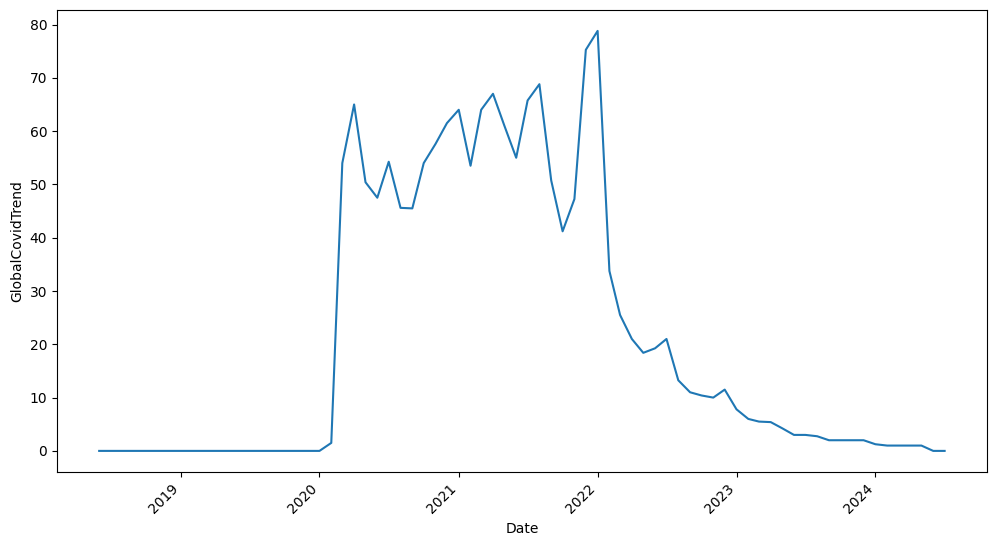

In [219]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=trend_df, x='Date', y='GlobalCovidTrend', ax=ax)
plt.xticks(rotation=45, ha='right');

In [220]:
trend_df.to_csv('./data/GoogleTrend.csv', index=False)